In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import math
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('Zillow_Final_Dataset (2).csv')

In [52]:
data.shape

(70260, 21)

In [4]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,logerror,yeardifference,propertyzoningdesc_labels
0,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,...,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,0.0383,33.0,627
1,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,...,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,0.0030,55.0,638
2,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,...,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,-0.0020,56.0,638
3,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,...,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,0.0129,52.0,632
4,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,...,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,0.0630,17.0,769
5,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,...,60.371313,12447.0,3101.0,96355.0,0.0,1.0,4560.02,-0.1244,61.0,609
6,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,...,60.371341,12447.0,3101.0,96341.0,0.0,1.0,4998.86,0.0545,51.0,638
7,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,...,60.371331,12447.0,3101.0,96364.0,0.0,1.0,5784.98,0.0070,62.0,609
8,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,...,60.371325,12447.0,3101.0,96364.0,0.0,1.0,3441.90,0.0611,64.0,609
9,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,...,60.371393,12447.0,3101.0,96379.0,0.0,1.0,3833.83,-0.0471,36.0,625


In [5]:
data.isnull().sum()

parcelid                     0
bathroomcnt                  0
bedroomcnt                   0
buildingqualitytypeid        0
finishedsquarefeet12         0
fips                         0
heatingorsystemtypeid        0
latitude                     0
longitude                    0
lotsizesquarefeet            0
propertylandusetypeid        0
rawcensustractandblock       0
regionidcity                 0
regionidcounty               0
regionidzip                  0
roomcnt                      0
unitcnt                      0
taxamount                    0
logerror                     0
yeardifference               0
propertyzoningdesc_labels    0
dtype: int64

In [6]:
data.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,logerror,yeardifference,propertyzoningdesc_labels
count,7.026000e+04,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,...,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000,70260.000000
mean,1.264719e+07,2.161707,2.943311,6.095403,1625.718773,6043.853003,3.076373,33.984750,-118.114236,19464.530154,...,60.441838,28183.745175,2535.627242,96535.460077,1.103274,1.013450,5154.241861,0.007918,47.023143,807.585796
std,1.298285e+06,0.804526,0.982020,1.442145,664.043541,10.188420,2.042741,0.271945,0.280018,43247.858040,...,0.100070,19375.914376,840.544619,402.688190,2.508990,0.162544,3473.042495,0.084931,23.094977,421.665147
min,1.071174e+07,0.000000,0.000000,4.000000,2.000000,6037.000000,1.000000,33.339295,-118.893928,438.000000,...,60.371011,3491.000000,1286.000000,95982.000000,0.000000,1.000000,126.720000,-0.468400,0.000000,0.000000
25%,1.147316e+07,2.000000,2.000000,4.000000,1163.000000,6037.000000,2.000000,33.788706,-118.353360,5878.000000,...,60.374002,12447.000000,1286.000000,96206.000000,0.000000,1.000000,2810.530000,-0.025300,29.000000,609.000000
50%,1.250097e+07,2.000000,3.000000,7.000000,1472.000000,6037.000000,2.000000,33.971500,-118.112581,6720.000000,...,60.375743,24384.000000,3101.000000,96395.000000,0.000000,1.000000,4429.850000,0.005000,47.000000,609.000000
75%,1.404722e+07,3.000000,4.000000,7.000000,1949.000000,6059.000000,2.000000,34.148200,-117.891000,9923.000000,...,60.590320,44833.000000,3101.000000,96975.000000,0.000000,1.000000,6520.287500,0.036300,62.000000,904.000000
max,1.476287e+07,5.000000,6.000000,10.000000,4400.000000,6059.000000,12.000000,34.799328,-117.554924,371079.000000,...,60.591106,118994.000000,3101.000000,97344.000000,9.000000,3.000000,26477.690000,0.494100,117.000000,1995.000000


In [9]:
#numerical 
numerical_values = []
for var in data.columns:
    if data[var].dtypes!='O':
        numerical_values.append(var)

print('Total number of Numerical Data: ', len(numerical_values))

Total number of Numerical Data:  21


In [7]:

categorical_variables = []
for var in data.columns:
    if data[var].dtypes=='O':
        categorical_variables.append(var)
        
print('Total number of Categorical Variables: ', len(categorical_variables))

Total number of Categorical Variables:  0


In [10]:
# Temporal Variables associated with time
year_variables = []
for var in numerical_values:
    if 'Yr' in var or 'year' in var:
        year_variables.append(var)
        
len(year_variables), year_variables

(1, ['yeardifference'])

In [12]:
discrete_variables = []
for var in numerical_values:
    if len(data[var].unique()) < 20:
        discrete_variables.append(var)
        
print('Total number of Discrete Variables: ', len(discrete_variables))

Total number of Discrete Variables:  9


In [13]:
copy_data[discrete_variables].head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,fips,heatingorsystemtypeid,propertylandusetypeid,regionidcounty,roomcnt,unitcnt
0,3.0,3.0,4.0,6037.0,2.0,266.0,3101.0,0.0,1.0
1,2.0,3.0,7.0,6037.0,2.0,261.0,3101.0,0.0,1.0
2,2.0,4.0,7.0,6037.0,2.0,261.0,3101.0,0.0,1.0
3,3.0,4.0,4.0,6037.0,2.0,261.0,3101.0,0.0,1.0
4,3.0,2.0,4.0,6037.0,2.0,269.0,3101.0,0.0,1.0


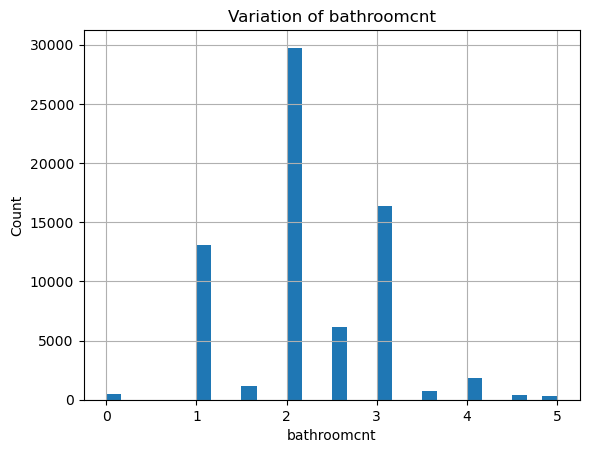

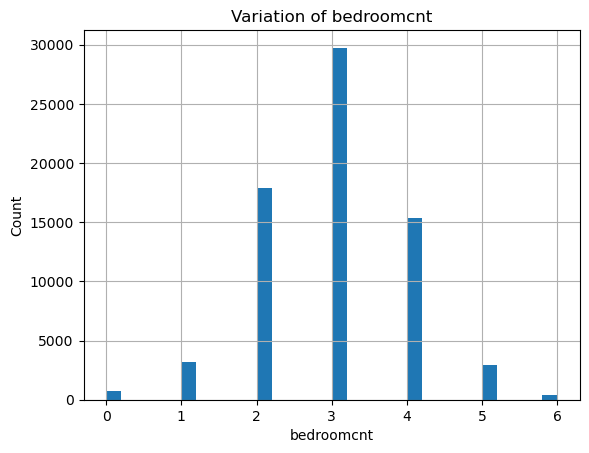

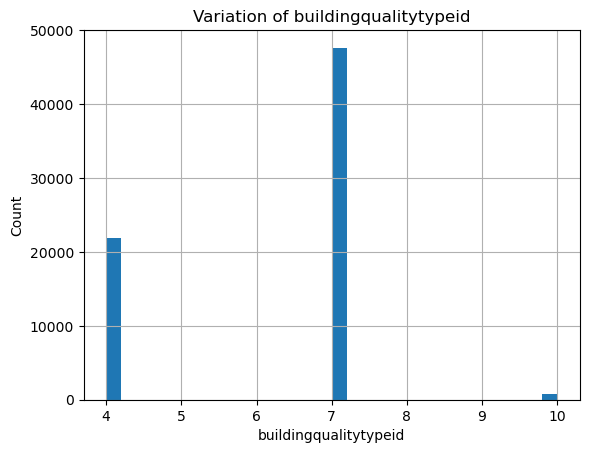

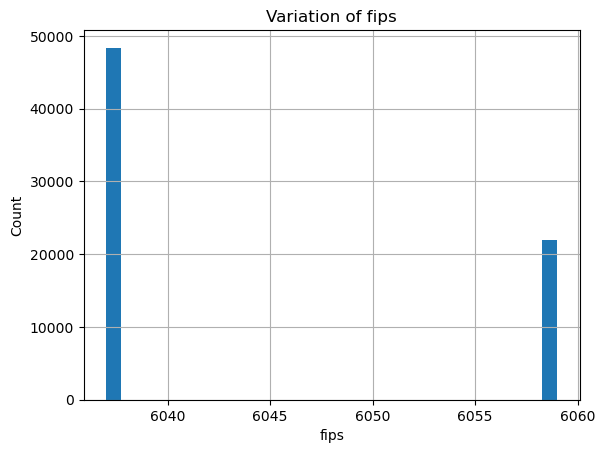

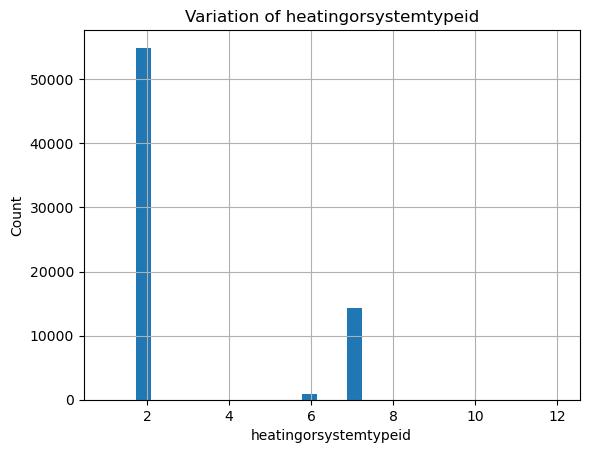

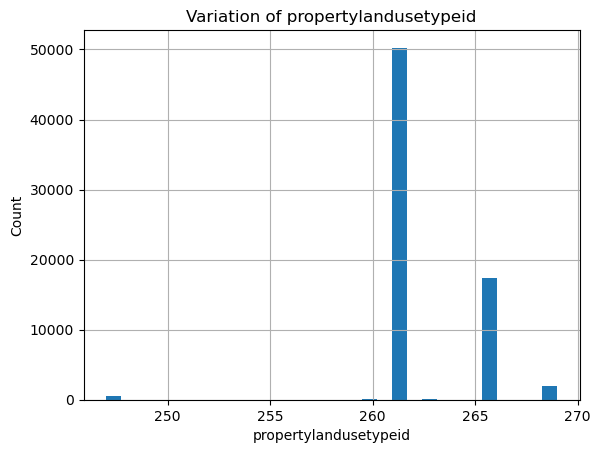

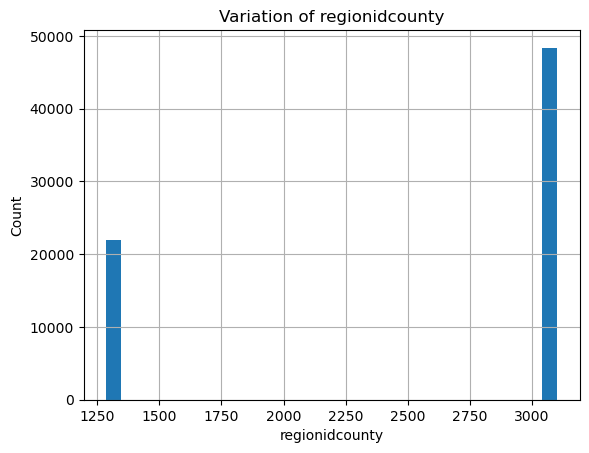

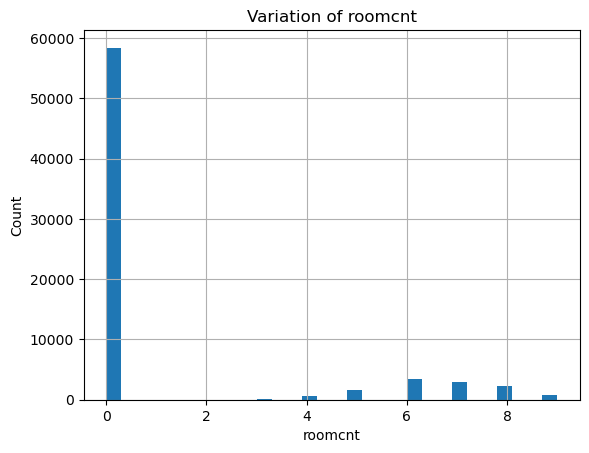

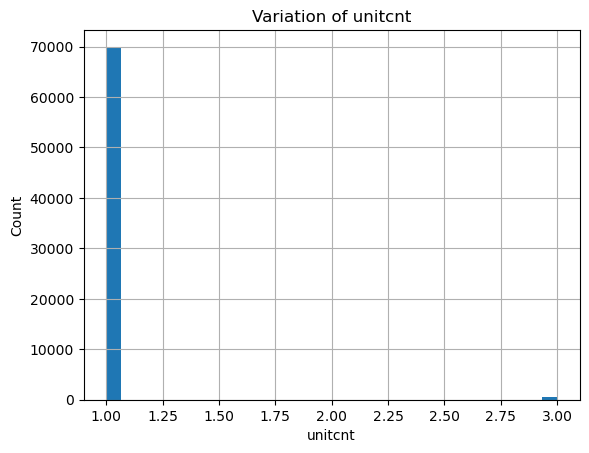

In [14]:
# The below code visualizes the distributions of discrete variables in the DataFrame by creating histograms for each discrete variable and displaying them one by one. In other words, quick review of the distribution and variation of these variables.
def analyze_discrete_variables(data, var):
    new_data = data.copy()
    new_data[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

for var in discrete_variables:
    analyze_discrete_variables(data, var)

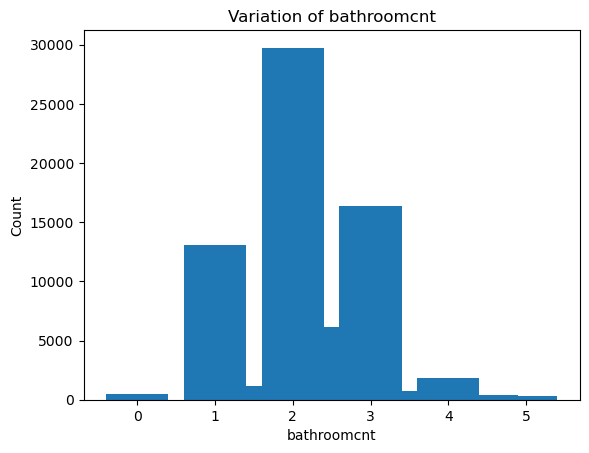

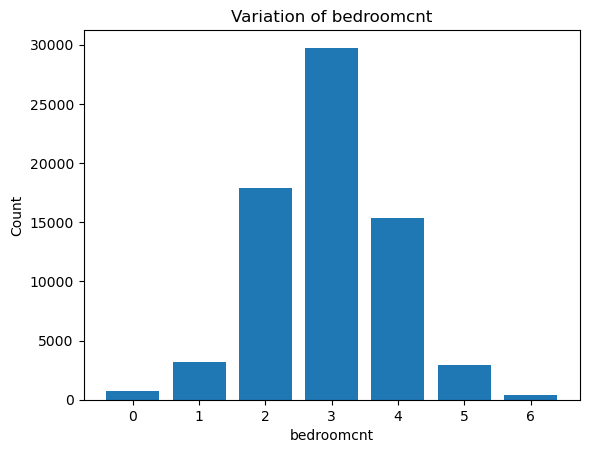

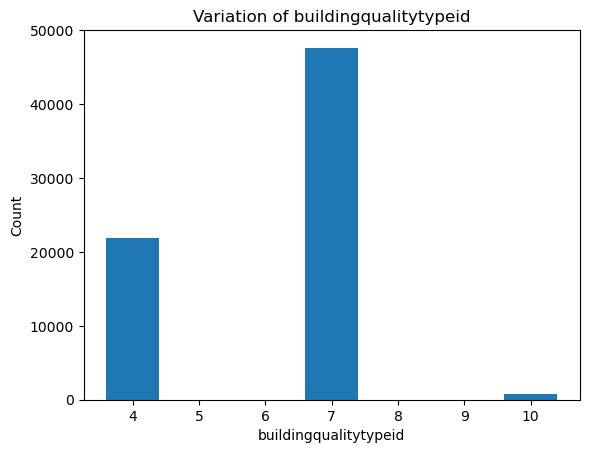

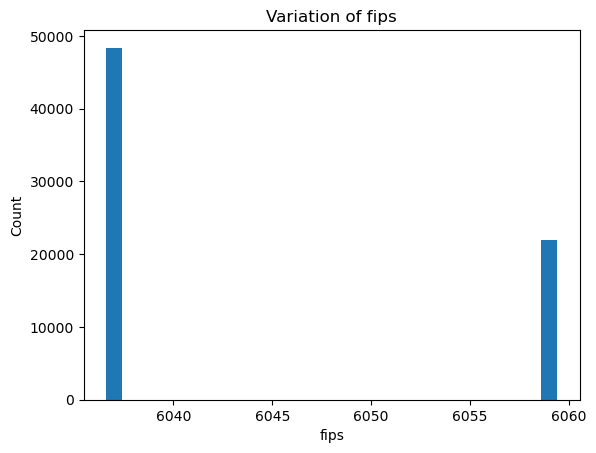

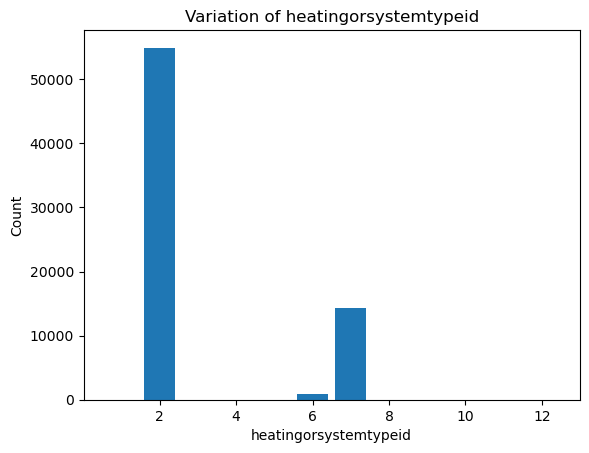

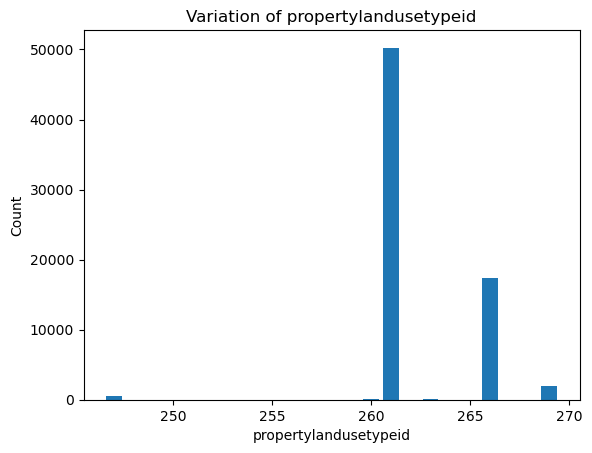

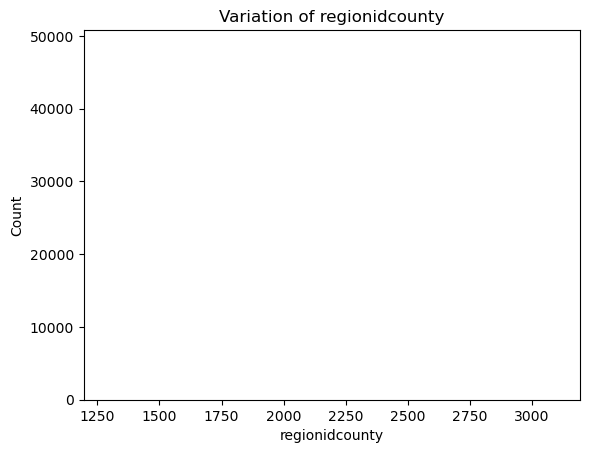

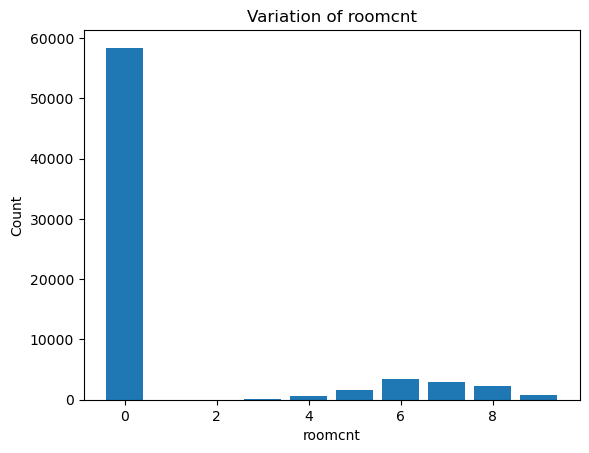

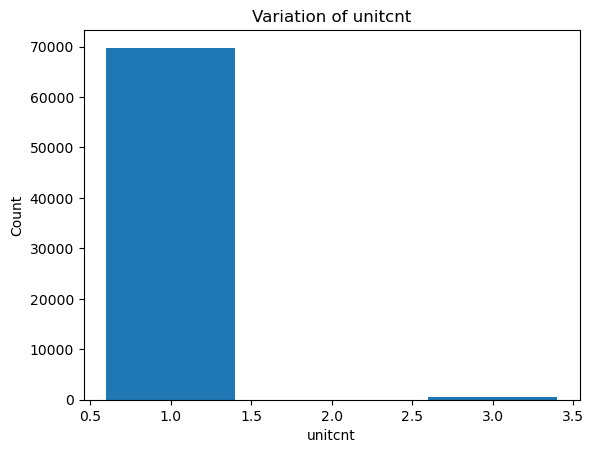

In [15]:
# Bar Graph equivalent of above Histogram
def analyze_discrete_variables(data, var):
    value_counts = data[var].value_counts()
    val = value_counts.index
    cnt = value_counts.values
    
    plt.bar(val, cnt)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+var)
    plt.show()

for var in discrete_variables:
    analyze_discrete_variables(data, var)

In [16]:
# Continuous Variables Distribution
# Those variables which are not in discrete_variables list as well as not in year_variables list
continuous_variables = []

for var in numerical_values:
    if var not in discrete_variables and year_variables:
        continuous_variables.append(var)
        
print('Total number on Continuous Variables: ', len(continuous_variables))

Total number on Continuous Variables:  12


In [17]:
data[continuous_variables].head()

,parcelid,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidzip,taxamount,logerror,yeardifference,propertyzoningdesc_labels
0,10726315,2445.0,34.184300,-118.657000,63878.0,60.371352,12447.0,96389.0,7170.22,0.0383,33.0,627
1,10727091,1160.0,34.188121,-118.646361,7688.0,60.371352,12447.0,96342.0,5421.96,0.0030,55.0,638
2,10730788,1570.0,34.188446,-118.616724,11308.0,60.371351,12447.0,96342.0,5097.78,-0.0020,56.0,638
3,10735394,2863.0,34.171439,-118.646883,16376.0,60.371373,12447.0,96389.0,7475.21,0.0129,52.0,632
4,10743512,1394.0,34.152890,-118.791494,77543.0,60.378003,34278.0,96385.0,5550.36,0.0630,17.0,769


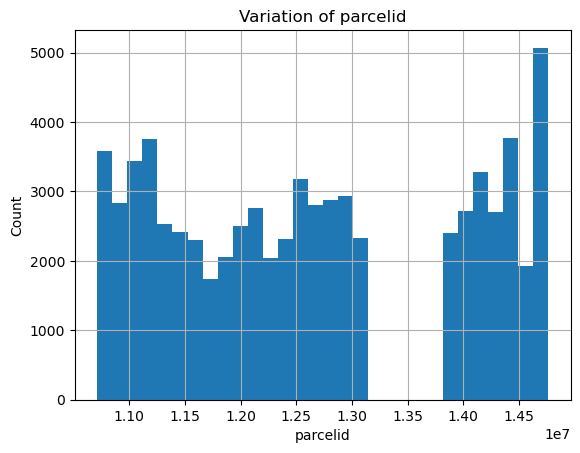

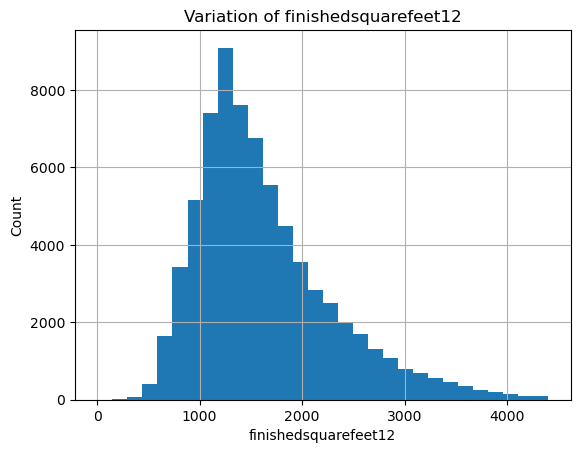

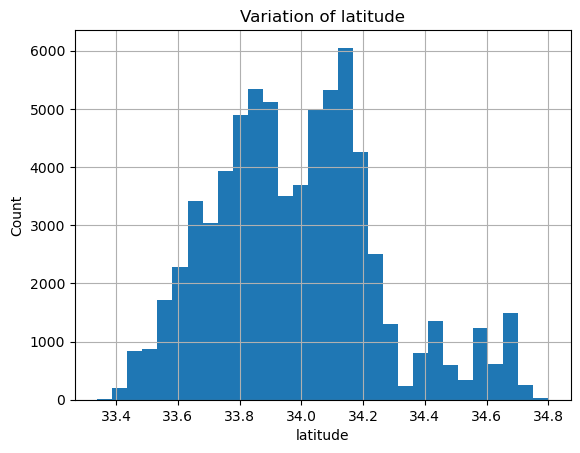

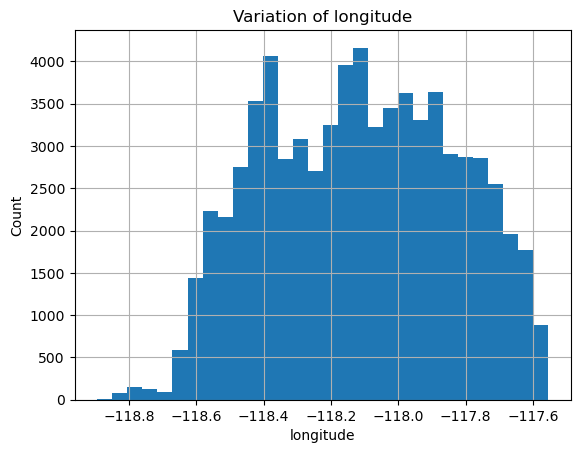

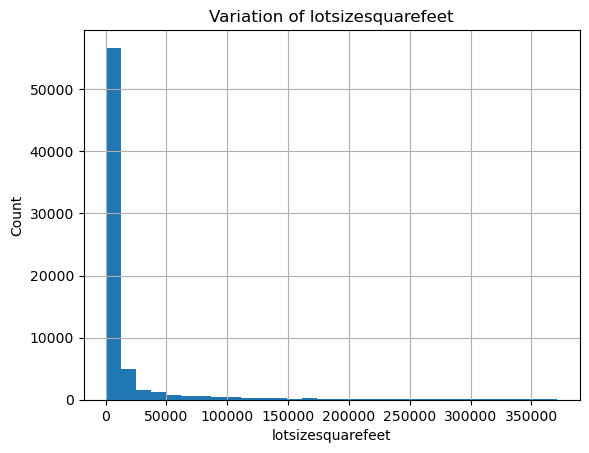

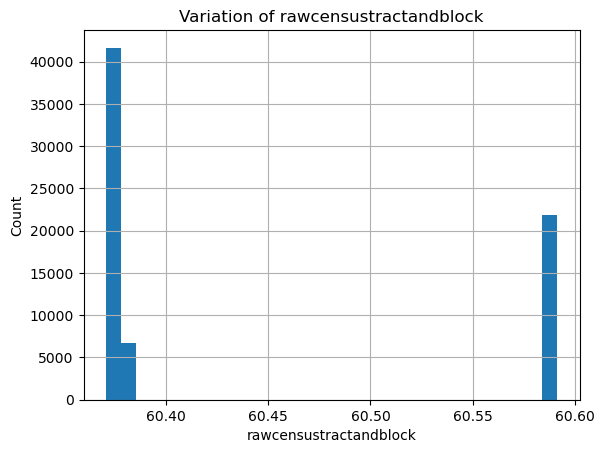

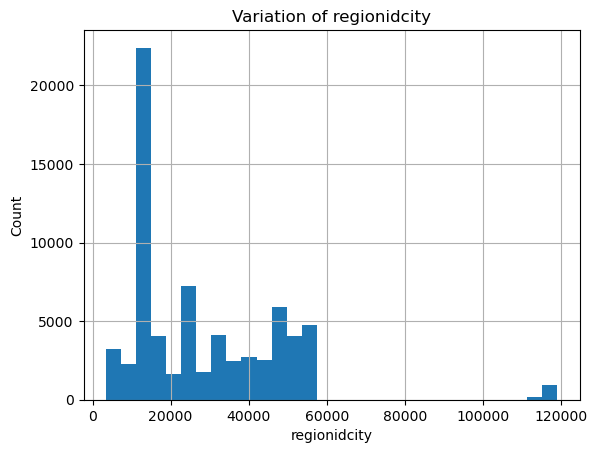

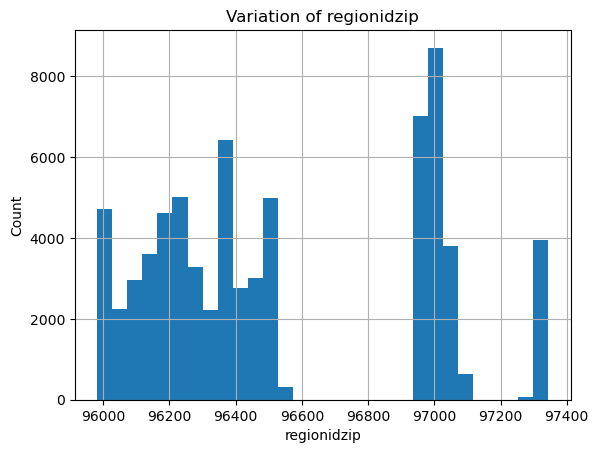

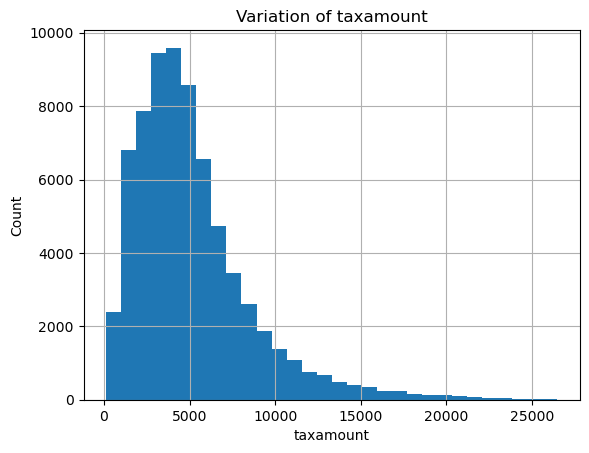

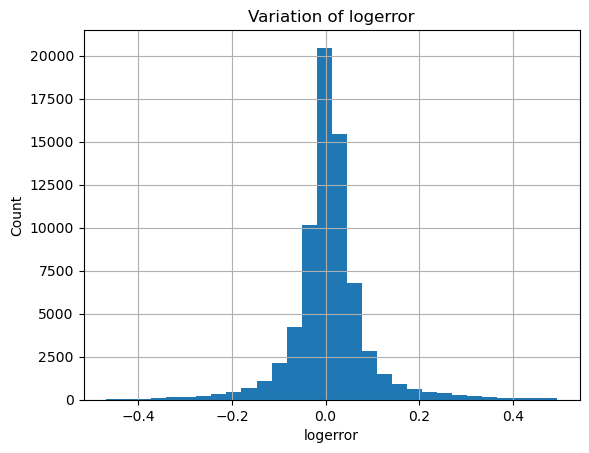

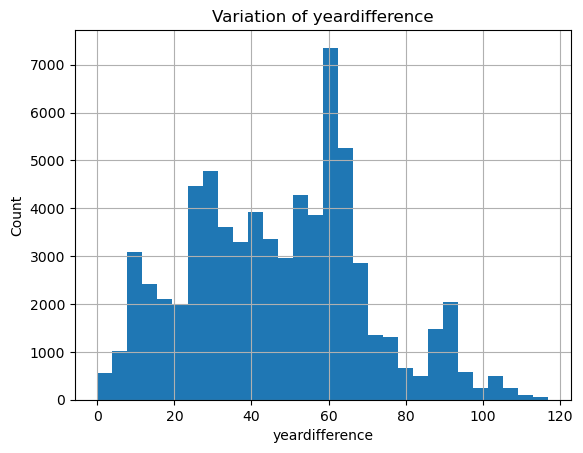

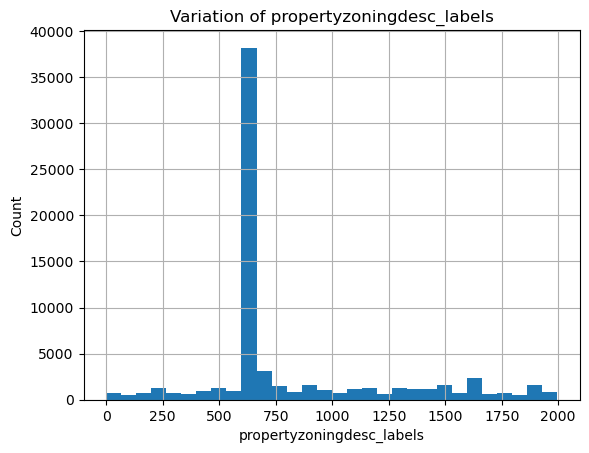

In [18]:
# Below Code visualizes the distributions of continuous variables in the DataFrame by creating histogram for each continuous variable and displaying them one by one. In other words, allows for quick review of distribution of these variables.
def analyze_continuous_variables(data,var):
    
    new_data = data.copy()
    new_data[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in continuous_variables:
    analyze_continuous_variables(data,var)

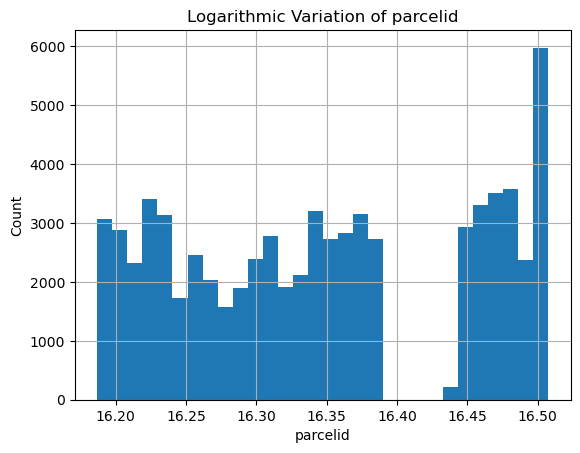

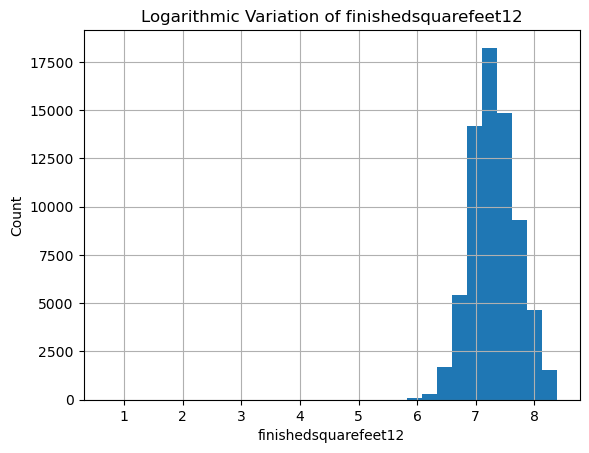

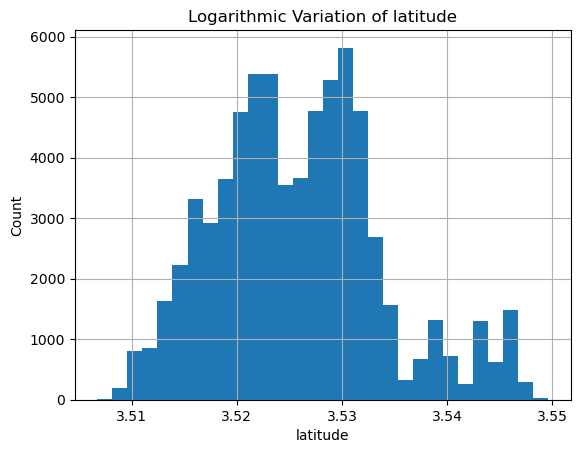

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


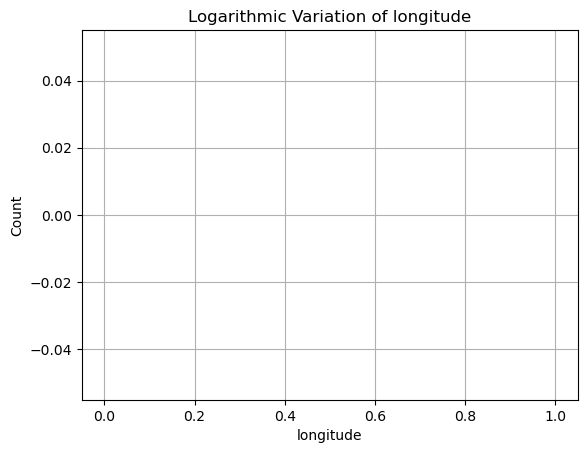

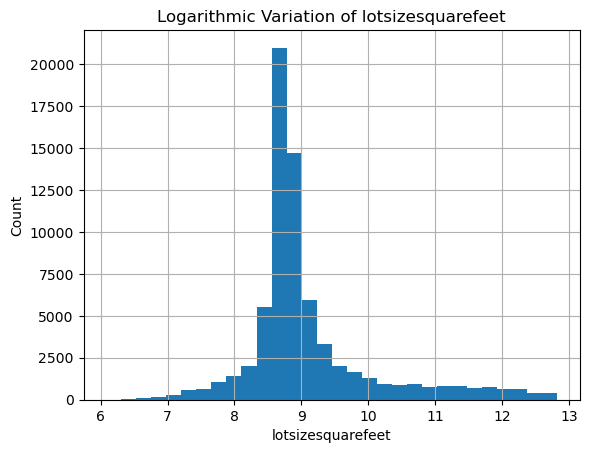

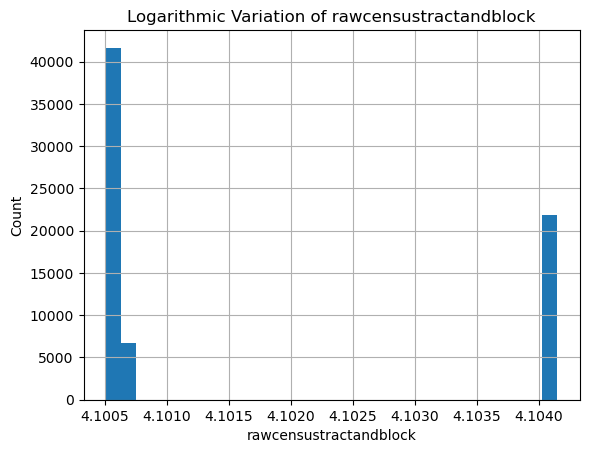

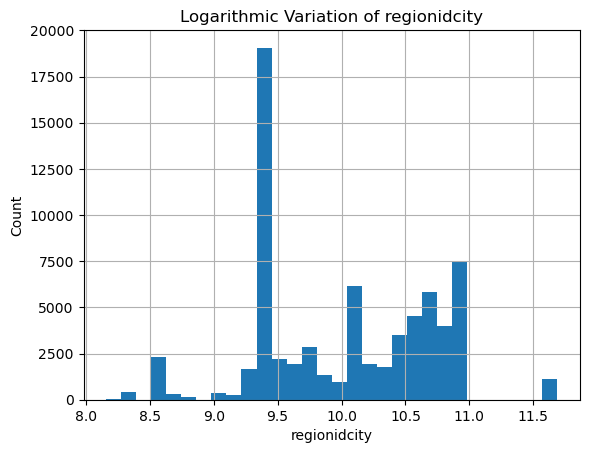

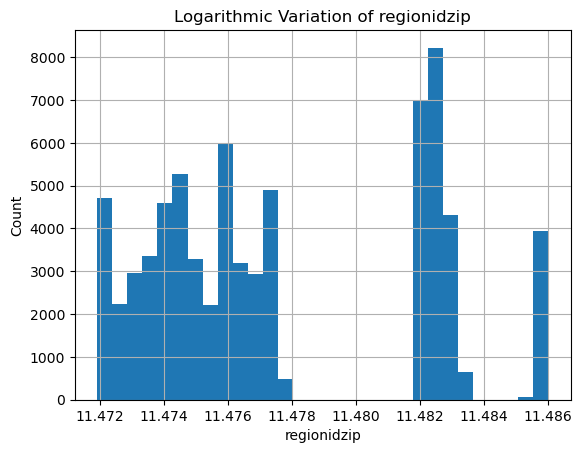

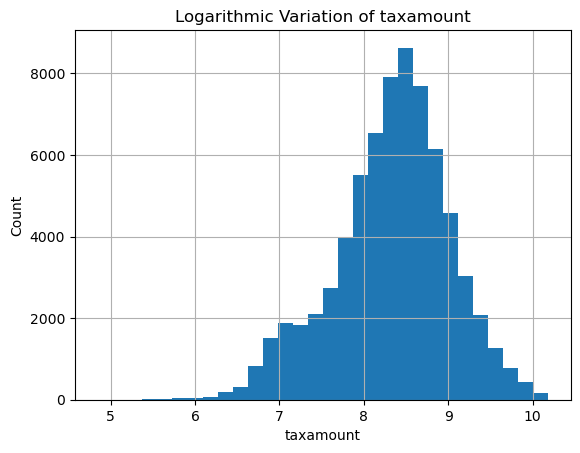

In [19]:
# Some of the variables are not normally distributed. 

# Logarithmic Transformation of Variables
def analyze_log_variations(data, var):
    new_data = data.copy()
    if 0 in new_data[var].unique():
        pass
    else:
        new_data[var] = np.log(new_data[var])
        new_data[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()

for var in continuous_variables:
    analyze_log_variations(data, var)

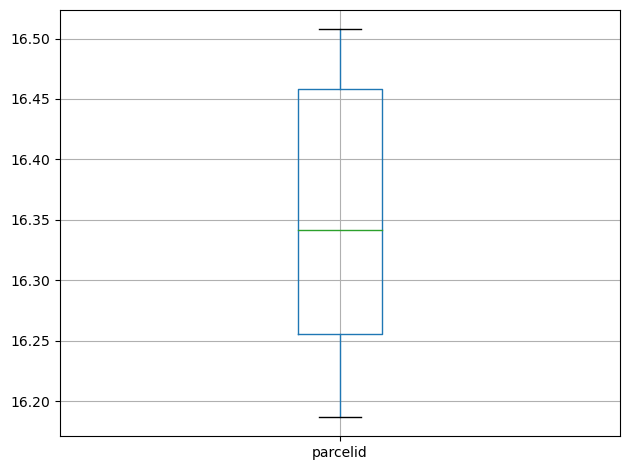

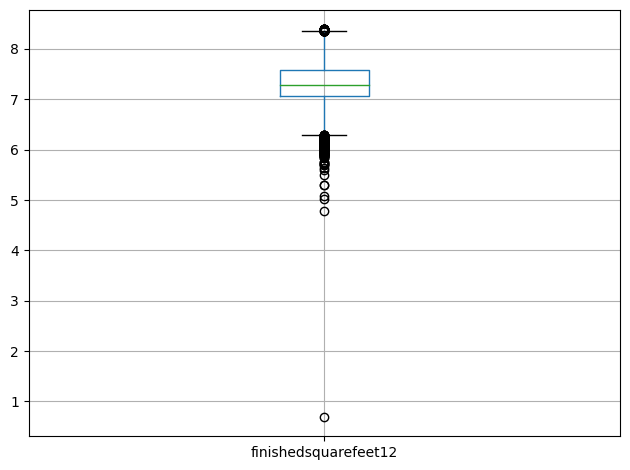

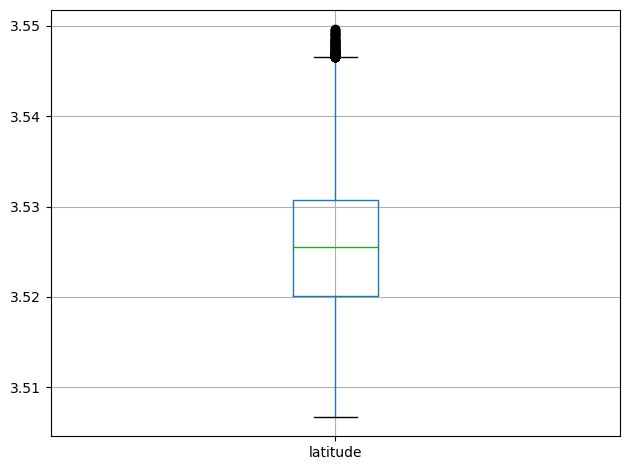

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


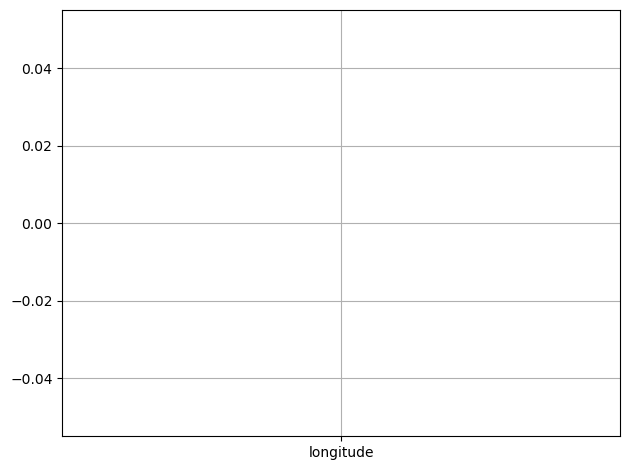

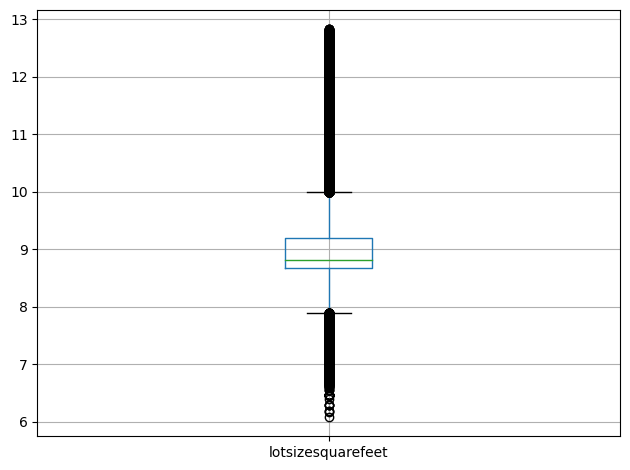

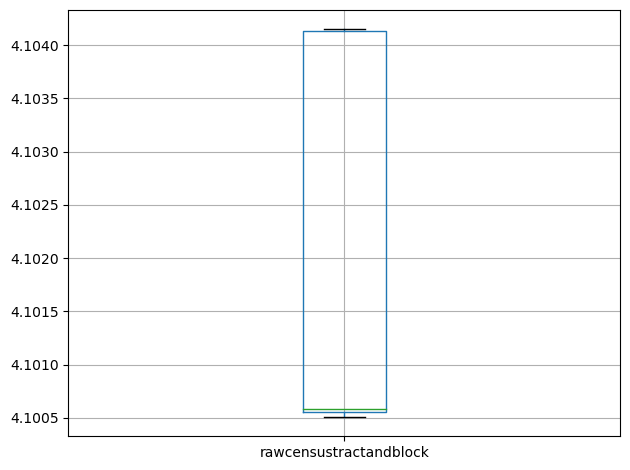

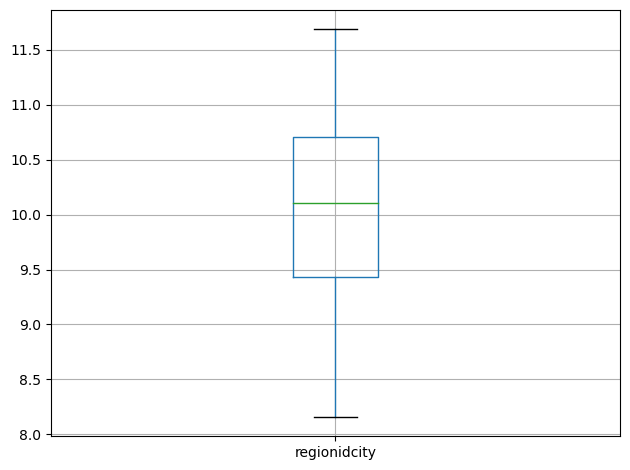

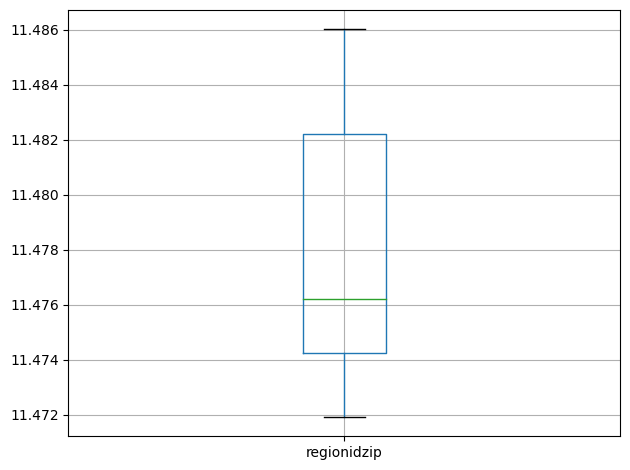

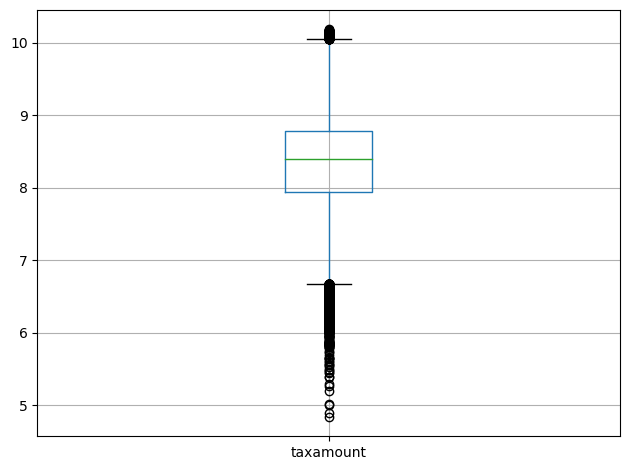

In [20]:
# We get a better spread of some variables on using logarithmic transformation.
# Outliers
# Outliers are the data points that significantly differ from the majority of the data in a dataset. These data points are unusual or rare in the context of the dataset and can have a significant impact on statistical analysis, model performance, and the accuracy of Ml algorithm. Outliers can occurr in both numerical and categorical data.
def analyze_outliers(data, var):
    new_data = data.copy()
    if 0 in new_data[var].unique():
        pass
    else:
        new_data[var] = np.log(data[var])
        new_data.boxplot(column=var)
        plt.tight_layout()
        plt.show()

for var in continuous_variables:
    analyze_outliers(data, var)
    print()
    print()

In [ ]:
# Splitting data into Train and Test Set

In [54]:
X = data.drop('logerror', axis=1)
y = data['logerror']

In [55]:
new_data = data.copy()

In [56]:
X.shape

(70260, 20)

In [57]:
y.shape

(70260,)

In [58]:
X.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,yeardifference,propertyzoningdesc_labels
0,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,266.0,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,33.0,627
1,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,261.0,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,55.0,638
2,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,261.0,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,56.0,638
3,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,261.0,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,52.0,632
4,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,269.0,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,17.0,769
5,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,261.0,60.371313,12447.0,3101.0,96355.0,0.0,1.0,4560.02,61.0,609
6,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,261.0,60.371341,12447.0,3101.0,96341.0,0.0,1.0,4998.86,51.0,638
7,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,261.0,60.371331,12447.0,3101.0,96364.0,0.0,1.0,5784.98,62.0,609
8,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,261.0,60.371325,12447.0,3101.0,96364.0,0.0,1.0,3441.90,64.0,609
9,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,266.0,60.371393,12447.0,3101.0,96379.0,0.0,1.0,3833.83,36.0,625


In [59]:
y.head(10)

0    0.0383
1    0.0030
2   -0.0020
3    0.0129
4    0.0630
5   -0.1244
6    0.0545
7    0.0070
8    0.0611
9   -0.0471
Name: logerror, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [61]:
X_train.shape, X_test.shape

((56208, 20), (14052, 20))

In [62]:
y_train.shape, y_test.shape

((56208,), (14052,))

In [ ]:
# Feature Scaling

In [63]:
train_variables = []
for var in X_train.columns:
    if var not in ['parcelid', 'logerror']:
        train_variables.append(var)
        
len(train_variables)

19

In [64]:
scaler = StandardScaler()
scaler.fit(X_train[train_variables])

X_train[train_variables] = scaler.transform(X_train[train_variables])
X_test[train_variables] = scaler.transform(X_test[train_variables])

In [65]:
X_train.shape

(56208, 20)

In [66]:
X_train.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,yeardifference,propertyzoningdesc_labels
11733,11041069,-0.197352,0.061984,-1.455344,-0.223147,-0.672972,-0.528352,0.951100,-1.226572,-0.247220,-0.502529,-0.706626,-0.815020,0.672972,-0.413986,-0.440480,-0.082261,-1.159070,0.300944,-0.401762
33579,11879130,-0.197352,-0.954052,-1.455344,-0.961886,-0.672972,-0.528352,0.450290,-0.243563,1.256514,1.330899,-0.699972,-0.815020,0.672972,-1.272406,-0.440480,-0.082261,-0.400560,-0.912872,-0.432594
68974,12229225,-0.197352,1.078019,0.628394,0.278894,-0.672972,1.915573,-0.165314,-0.452496,-0.305814,-0.502529,-0.694077,-0.815020,0.672972,-1.371645,-0.440480,-0.082261,-0.474095,2.598525,-0.470542
59980,14628114,0.423779,0.061984,0.628394,-0.449292,1.485946,-0.528352,-1.241203,1.897581,-0.311565,1.330899,1.483038,-0.654202,-1.485946,1.134146,-0.440480,-0.082261,0.322571,-0.826171,-0.470542
1666,14093700,1.044910,1.078019,0.628394,-0.420647,1.485946,-0.528352,-0.730531,0.483726,-0.173901,-0.502529,1.488638,-0.173974,-1.485946,1.270600,2.344460,-0.082261,-1.219993,0.561048,-0.470542
63534,14733748,0.423779,0.061984,0.628394,-0.616639,1.485946,-0.528352,-1.480747,1.752018,-0.311565,1.330899,1.483038,-0.654202,-1.485946,1.134146,-0.440480,-0.082261,0.210161,-1.346378,-0.470542
1169,12080932,-0.197352,0.061984,0.628394,1.086984,-0.672972,1.915573,0.579060,-0.330687,-0.237875,-0.502529,-0.700242,-0.815020,0.672972,-1.274887,-0.440480,-0.082261,0.509681,2.511824,-0.470542
2778,10785210,-1.439614,0.061984,0.628394,-0.783986,-0.672972,1.915573,0.779267,-1.571452,-0.310406,-0.502529,-0.705038,-0.815020,0.672972,-0.426391,-0.440480,-0.082261,-0.424859,0.734450,-0.470542
21808,14017467,-0.197352,0.061984,0.628394,0.025612,1.485946,1.426788,-0.486496,0.407396,-0.311565,-0.502529,1.490866,-0.910206,-1.485946,-0.882892,1.548763,-0.082261,0.085812,0.387646,-0.470542
8257,11240447,1.044910,1.078019,-1.455344,1.047786,-0.672972,-0.528352,2.075074,-0.091749,0.616863,-0.502529,-0.627382,0.622869,0.672972,1.967755,-0.440480,-0.082261,-0.388135,-0.436015,0.340587


In [ ]:
# Dropping parcelid

In [67]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='parcelid', axis=1, inplace=True)
X_test.drop(columns='parcelid', axis=1, inplace=True)

In [68]:
X_train.shape, X_test.shape

((56208, 19), (14052, 19))

In [ ]:
# Linear Regression Model

In [69]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [70]:
linear_regression_prediction = linear_regression.predict(X_test)

In [71]:
linear_regression_prediction

array([-0.00565632, -0.0007824 ,  0.01668563, ...,  0.01559079,
        0.00250482,  0.00433461])

In [72]:
y_test

14808    0.3358
27489    0.2135
69881    0.0159
36967    0.0000
9803     0.0488
          ...  
62060   -0.0182
24167    0.1231
19312   -0.0050
46892    0.0060
21428    0.0816
Name: logerror, Length: 14052, dtype: float64

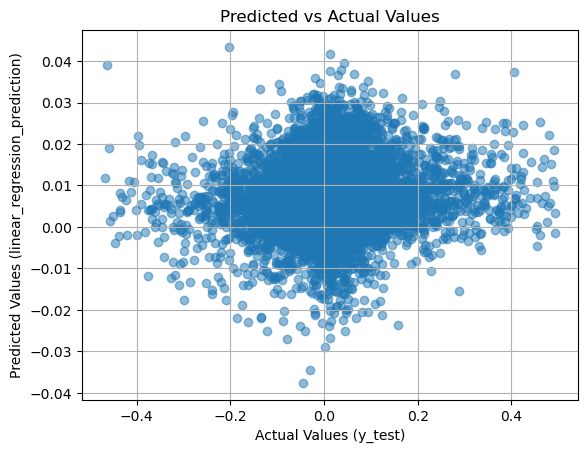

In [73]:
# Visualising predicted values and y_test

plt.scatter(y_test, linear_regression_prediction, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (linear_regression_prediction)')
plt.title('Predicted vs Actual Values')
plt.grid(True)

plt.show()

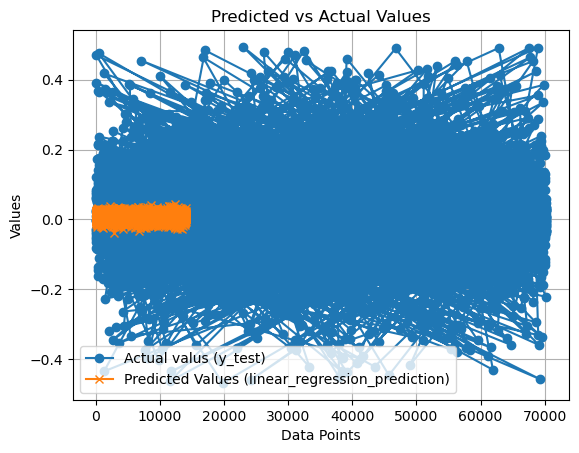

In [74]:
plt.plot(y_test, label='Actual valus (y_test)', marker='o')
plt.plot(linear_regression_prediction, label='Predicted Values (linear_regression_prediction)', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Scatter Plot with a line of best fit

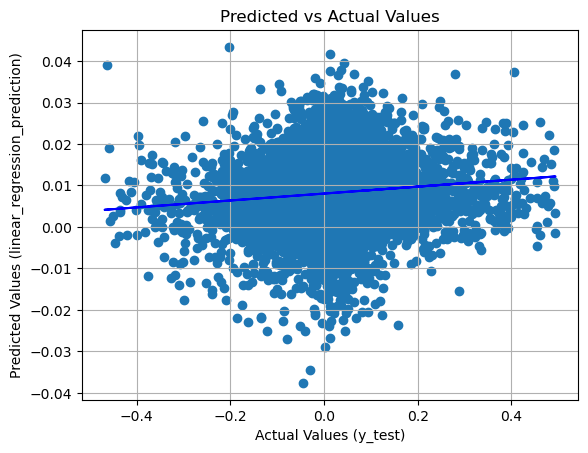

In [75]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(y_test, linear_regression_prediction)
line = slope * np.array(y_test) + intercept

plt.scatter(y_test, linear_regression_prediction)
plt.plot(y_test, line, color='blue')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (linear_regression_prediction)')
plt.title('Predicted vs Actual Values')
plt.grid(True)

plt.show()

In [ ]:
# Mean Absolute Error

In [76]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_regression_prediction)))

Mean Absolute Error : 0.052683398591761826


In [ ]:
# Mean Squared Error

In [77]:
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_regression_prediction)))

Mean Squared Error : 0.0071510871956413785


In [ ]:
# Root Mean Squared Error

In [78]:
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_regression_prediction))))

Root Mean Squared Error : 0.08456410110467312
